<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

ruta = '/content/drive/MyDrive/Colab_Notebooks/Miniproyecto1/'
#ruta = '/content/drive/MyDrive/Señales3/ArchivosLab5/'
fileName = 'DataMP1.csv'
dataFrame = pd.read_csv(ruta+fileName)

labels = dataFrame.iloc[:,-1]
X = dataFrame.iloc[:,1:43]

X

,GSR_ART,GSR_SP1,GSR_SP2,GSR_SP3,GSR_SP4,GSR_SP5,GST_SP6,GST_SP7,GST_SP8,GST_SP9,...,EEG_SPA2,EEG_SPA3,EEG_SPA4,EEG_SPA5,EEG_SPB1,EEG_SPB2,EEG_SPB3,EEG_SPB4,EEG_SPB5,emociones
0,2.8610,5824.086256,3160.889602,1531.962502,1407.169064,1112.161887,946.870950,928.750378,756.121295,697.973373,...,1.865161,5.184980,3.461216,5.041652,2.347163,1.275503,1.003328,0.899888,3.630238,-1
1,5.4277,5901.050602,5630.767559,3266.364561,2322.511795,2195.642188,1637.077819,1488.656242,1483.136799,979.991702,...,4.361935,7.807040,7.042410,11.376475,2.705221,1.546289,1.463202,1.123135,4.089784,1
2,3.2995,6631.572569,4495.135267,4154.063415,3820.369967,2106.092449,1860.914648,1788.312912,1565.316907,1290.922495,...,3.694577,6.448128,3.988058,13.472448,3.966875,7.282834,1.469042,1.323243,28.286193,1
3,1.7400,3651.065367,2169.304973,1506.748412,977.858909,731.283848,525.795948,505.031318,481.742671,478.189878,...,5.335904,4.490130,3.020488,15.374982,4.037560,3.302149,1.213788,0.994780,11.462958,1
4,2.8309,7820.942207,2373.298569,1500.350662,1314.859602,1184.245000,1132.603089,1061.837264,785.553400,752.792854,...,6.142650,5.798278,5.087005,25.914103,5.881958,11.364667,2.188542,2.427907,49.342339,0
5,2.0712,5098.209113,3616.809486,3574.573996,3571.895109,2086.905875,1507.515297,1417.932482,1234.394187,782.322385,...,4.123910,3.896095,3.614934,12.999729,3.476684,2.377859,1.493458,1.226882,7.242188,0
6,3.4401,5850.529766,3440.963239,2803.855218,1926.028872,1248.302459,1047.737737,982.579685,970.384118,933.926750,...,3.389828,5.144338,4.325678,9.845600,4.995091,2.106852,1.383918,1.079252,5.782894,1
7,2.4089,4480.883860,2206.169540,1752.638742,1327.046007,1079.291554,867.161223,558.254187,492.347030,476.239595,...,2.895643,4.206870,2.693486,11.025678,3.928179,1.561336,1.005914,0.768845,4.644839,-1
8,2.3834,3492.834431,2144.129060,1096.500488,936.078126,709.164006,579.806225,518.769025,445.785444,441.220480,...,2.357371,5.321294,3.388625,5.438403,1.701443,0.935837,1.488231,0.889604,1.781128,0
9,3.3529,8832.824545,4777.153307,4094.881401,2088.918366,2011.623456,1634.592848,1634.156187,1338.195001,1132.827898,...,4.012138,5.584374,4.661680,13.543346,3.529477,2.317885,1.253263,0.937862,8.117149,0


In [14]:
scaler = StandardScaler()
scaler.fit(X)
print('Var',scaler.var_)
print('mean',scaler.mean_)
Xscaled = scaler.transform(X)

Var [1.16350175e+00 8.80107329e+06 2.40891846e+06 1.20430982e+06
 7.48508987e+05 4.59988747e+05 2.24229509e+05 2.13188961e+05
 1.76411617e+05 1.39691487e+05 1.20926223e+05 1.97457110e+07
 9.76106267e+05 4.81867736e+12 9.00496329e+10 1.37402642e+10
 8.23330587e+03 2.13400000e+01 1.33854158e+00 4.08832424e-03
 6.40169662e-06 1.09141177e-15 3.13110560e-18 1.88275000e+01
 5.13612165e+00 1.19791530e+07 9.54141419e+00 2.30124256e+02
 1.31000164e+00 1.20303327e+00 3.98813547e+03 1.88937906e-01
 1.82400695e+00 9.44133887e-01 1.30306249e+00 3.25992350e+01
 3.59913876e+00 3.51817233e+00 4.43392111e-02 7.77329918e-02
 7.19682738e+01 4.94375000e-01]
mean [ 3.06002000e+00  6.14889010e+03  3.43651618e+03  2.33328085e+03
  1.76207895e+03  1.41825810e+03  1.14090518e+03  1.01227249e+03
  8.95283623e+02  8.03581299e+02  7.12966505e+02  8.62228916e+02
  4.33641383e+03  2.77099650e+06  3.58977844e+05  1.02279206e+05
  5.81418446e+00  1.64000000e+01  3.74361566e+00 -1.81259511e-02
 -9.14063927e-05  4.0131

Para que el modelo predictivo tenga un mejor desempeño hay que normalizar los datos, esto es, hacer que para cada caracteristica la varianza sea 1 y la media sea 0. Con el proposito de tener magnitudes mas pequeñas y escaladas con respecto a todas las caracteristicas.

Input Space: (40, 42)
Latent Space: (40, 40)
[1.05846358e+01 7.21439065e+00 3.65246643e+00 3.16390120e+00
 2.72988320e+00 2.25766104e+00 1.99675821e+00 1.72653173e+00
 1.46869163e+00 1.36196859e+00 1.15296636e+00 8.78976191e-01
 7.39161429e-01 6.56631206e-01 5.05232707e-01 4.82354847e-01
 4.19647608e-01 3.29721248e-01 3.07349800e-01 2.48169371e-01
 2.19522165e-01 1.94523022e-01 1.60795217e-01 1.30750124e-01
 1.11108494e-01 8.43945644e-02 7.99909127e-02 5.63238758e-02
 4.31062474e-02 2.87482586e-02 2.77529952e-02 1.93119043e-02
 1.69247780e-02 1.14789835e-02 5.17489401e-03 4.57319284e-03
 3.08515562e-03 1.29756256e-03 9.61449900e-04 5.18034584e-32]
(40, 42)


Text(0, 0.5, 'Cumulative explained variance')

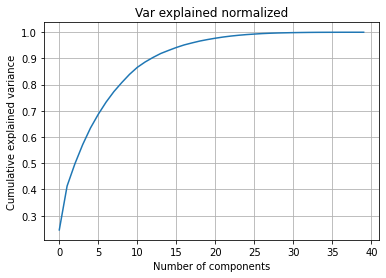

In [15]:
pca = PCA(n_components = 40)  # project from 42 to 40 dimensions

projectedZ = pca.fit_transform(Xscaled)
BasisW = pca.components_
print('Input Space:',Xscaled.shape)
print('Latent Space:',projectedZ.shape)
print(pca.explained_variance_)
print(BasisW.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.title('Var explained normalized')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Se uso la varianza acumulativa para poder observar al rededor de cuantas componentes eran necesarias para alcansar el 90% de la varianza del dataset. Como se puede observar en la grafica anterior al rededor de 13 componentes se logra dicho objetivo, por lo que podriamos reducir el dataset de 42 componentes a tan solo 13 y obtener buenos resultados. Para efectos de analisis vamos a trabajar con valores de q = [7,10,13,15,16,19,20,22,25], esto con el fin de analiza como se comporta el parametro de accuaracy dependiendo del número de componentes que se tomen con respecto a los modelos de regresión logistica y Bayesiano.

In [16]:
def pca_function(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)
  #projected = pca.inverse_transform(components)
  sns.set_style('darkgrid')
  #fig, ax = plt.subplots()
  projectedZDF = pd.DataFrame(data = projectedZ)
  projectedZDF['emociones'] = labels
  unique = labels.unique()
  palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
  ax = sns.pairplot(data=projectedZDF, hue='emociones', palette=palette, corner = True)

  plt.tight_layout()
  plt.figure()

  return projectedZ


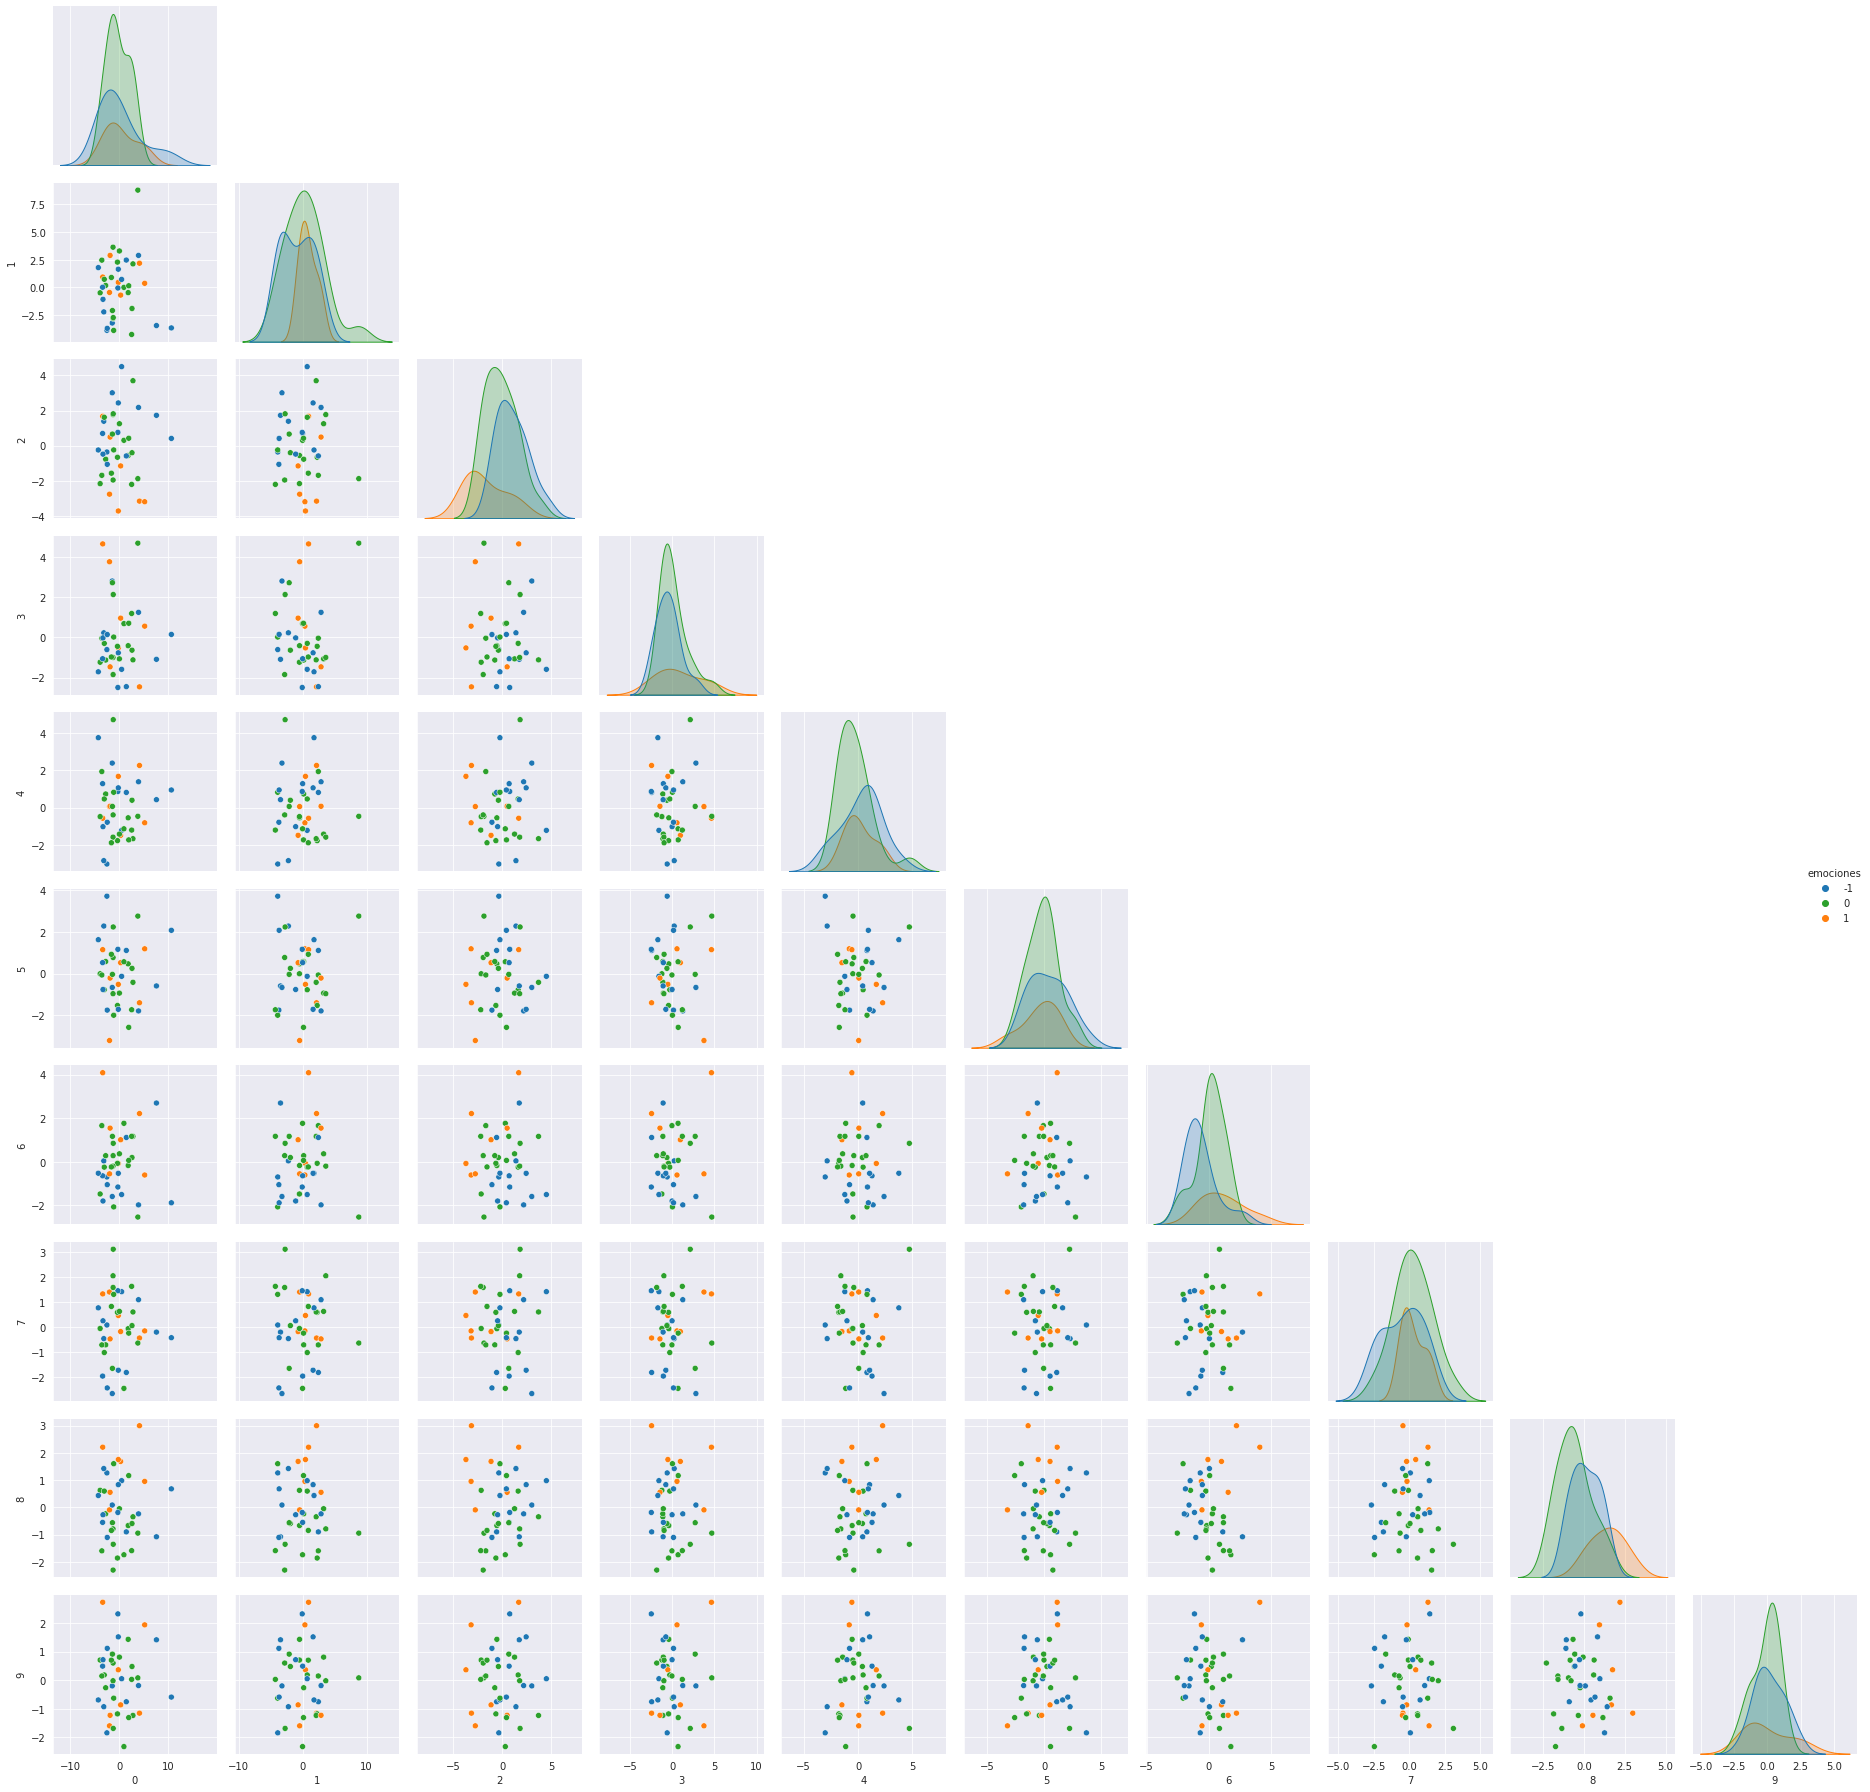

<Figure size 432x288 with 0 Axes>

In [17]:
projected_10 = pca_function(Xscaled, 10)

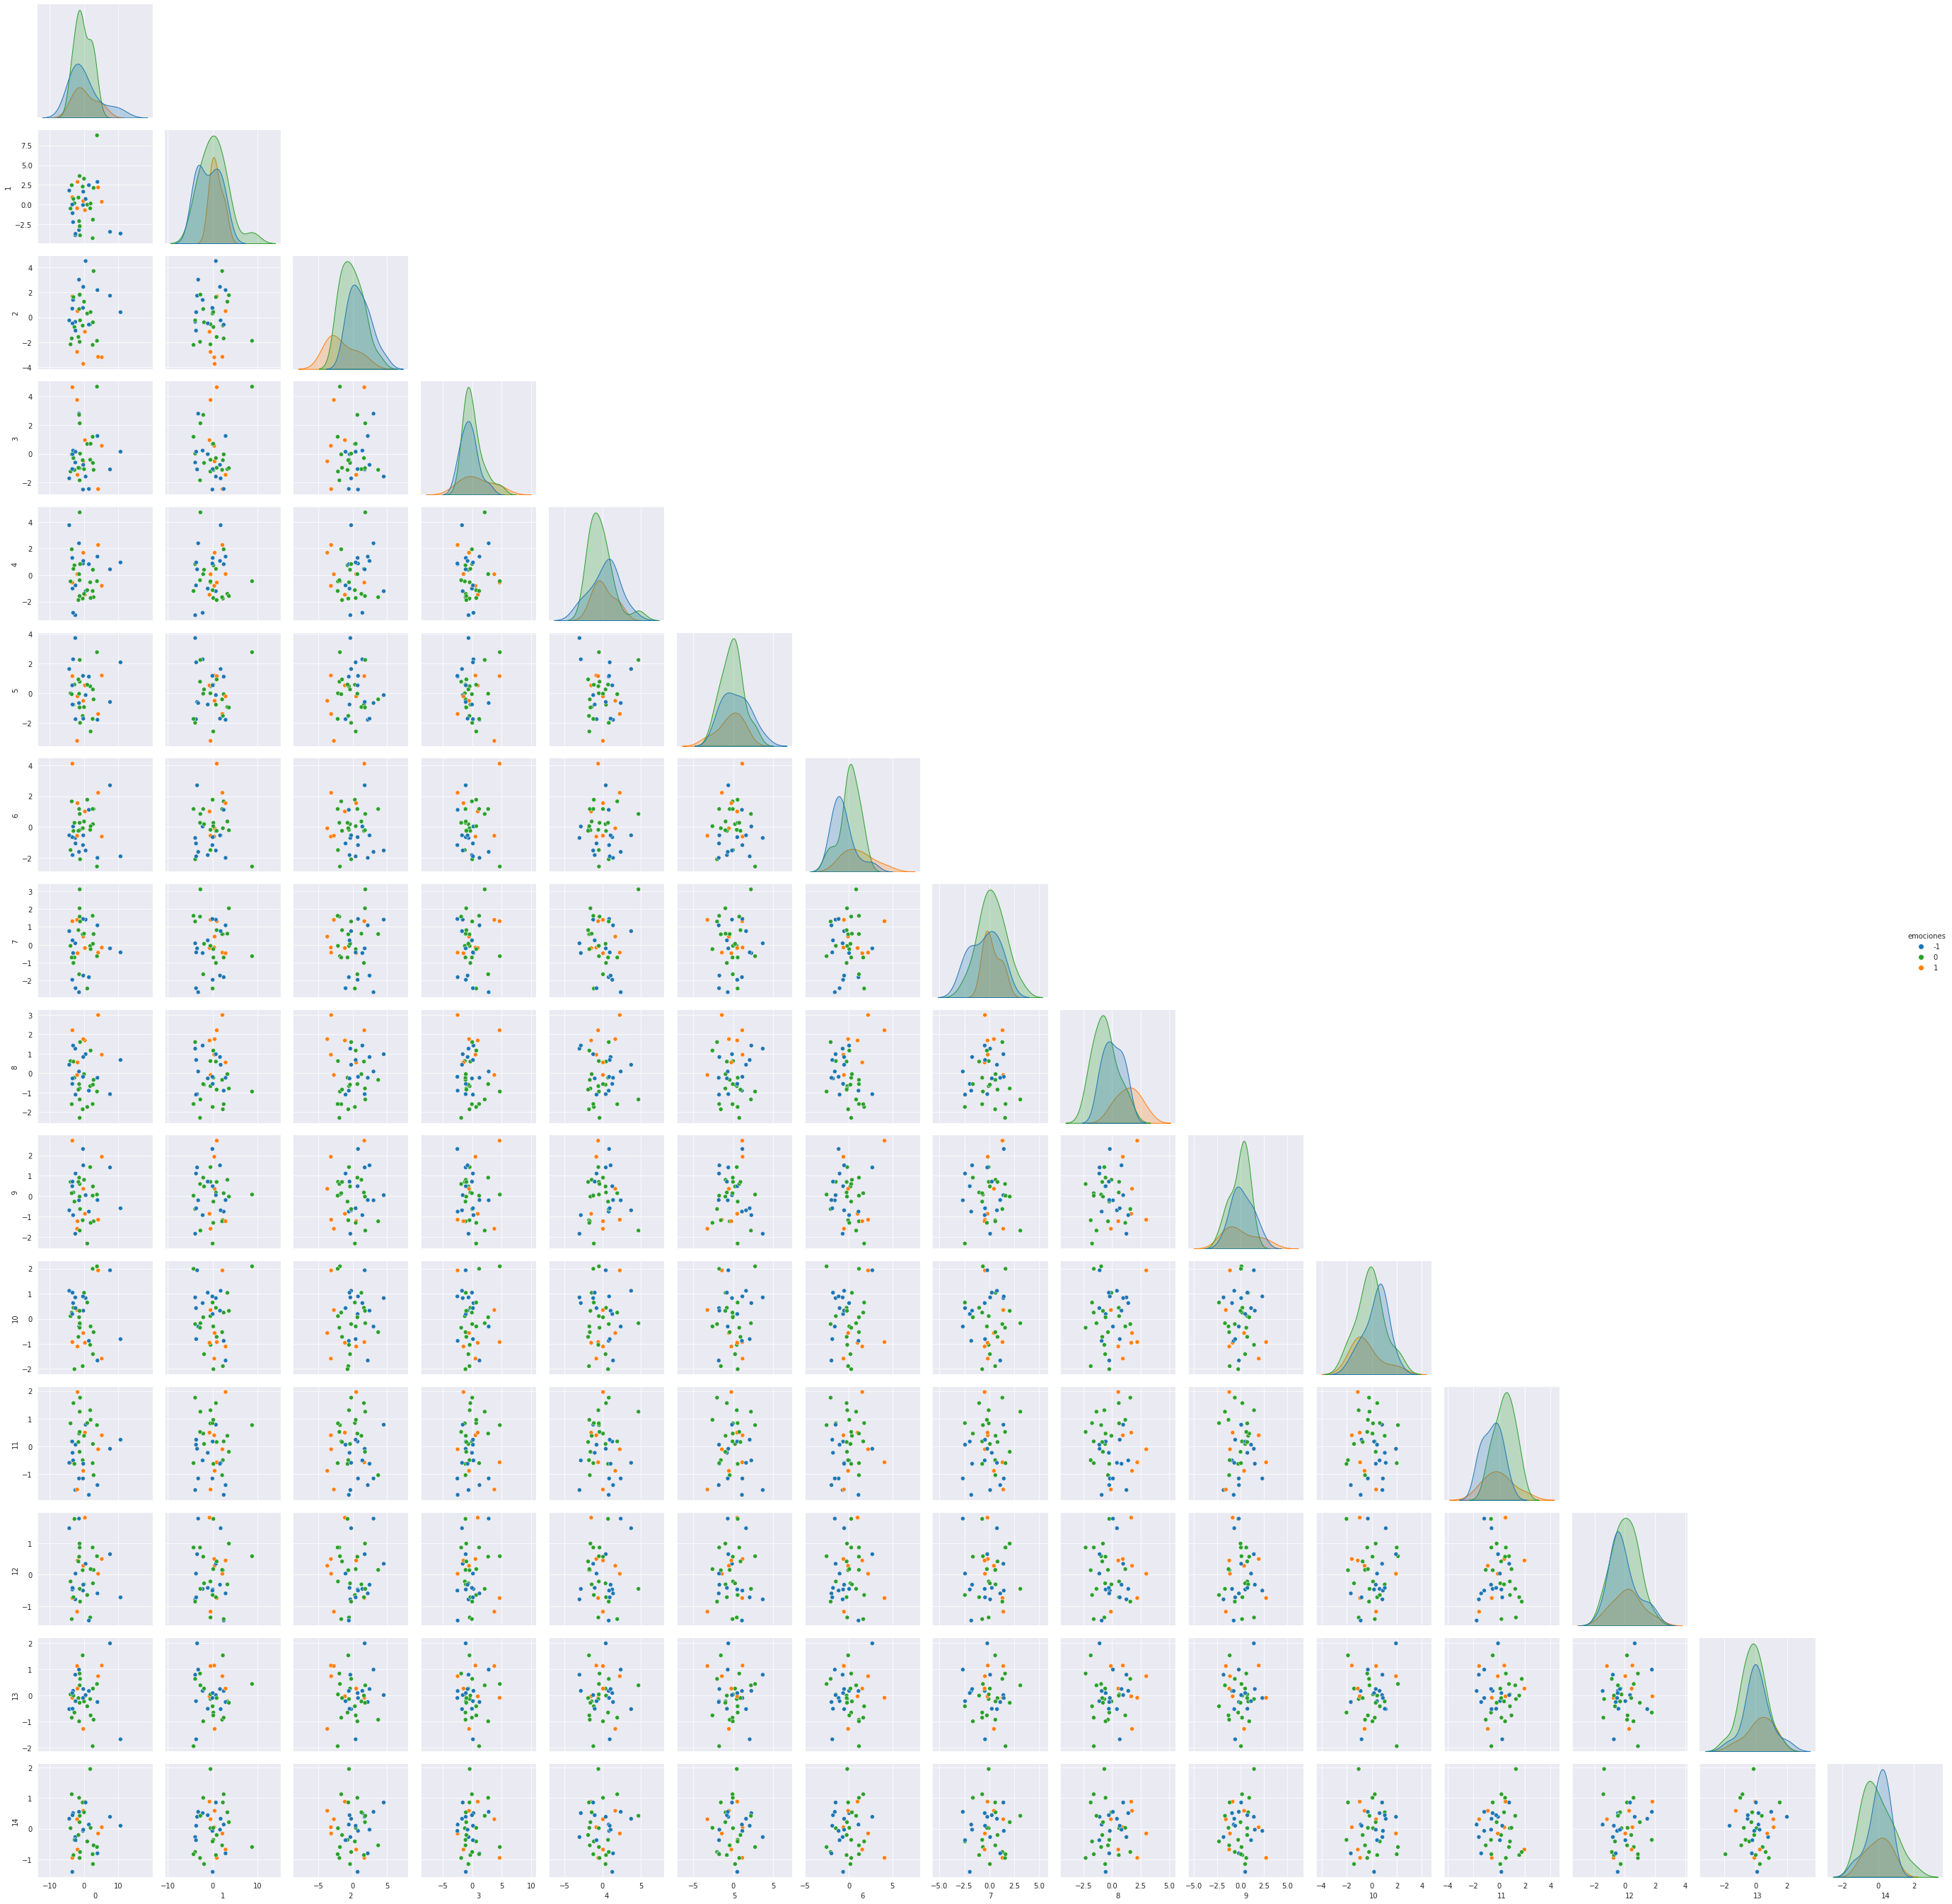

<Figure size 432x288 with 0 Axes>

In [18]:
projected_15 = pca_function(Xscaled, 15)

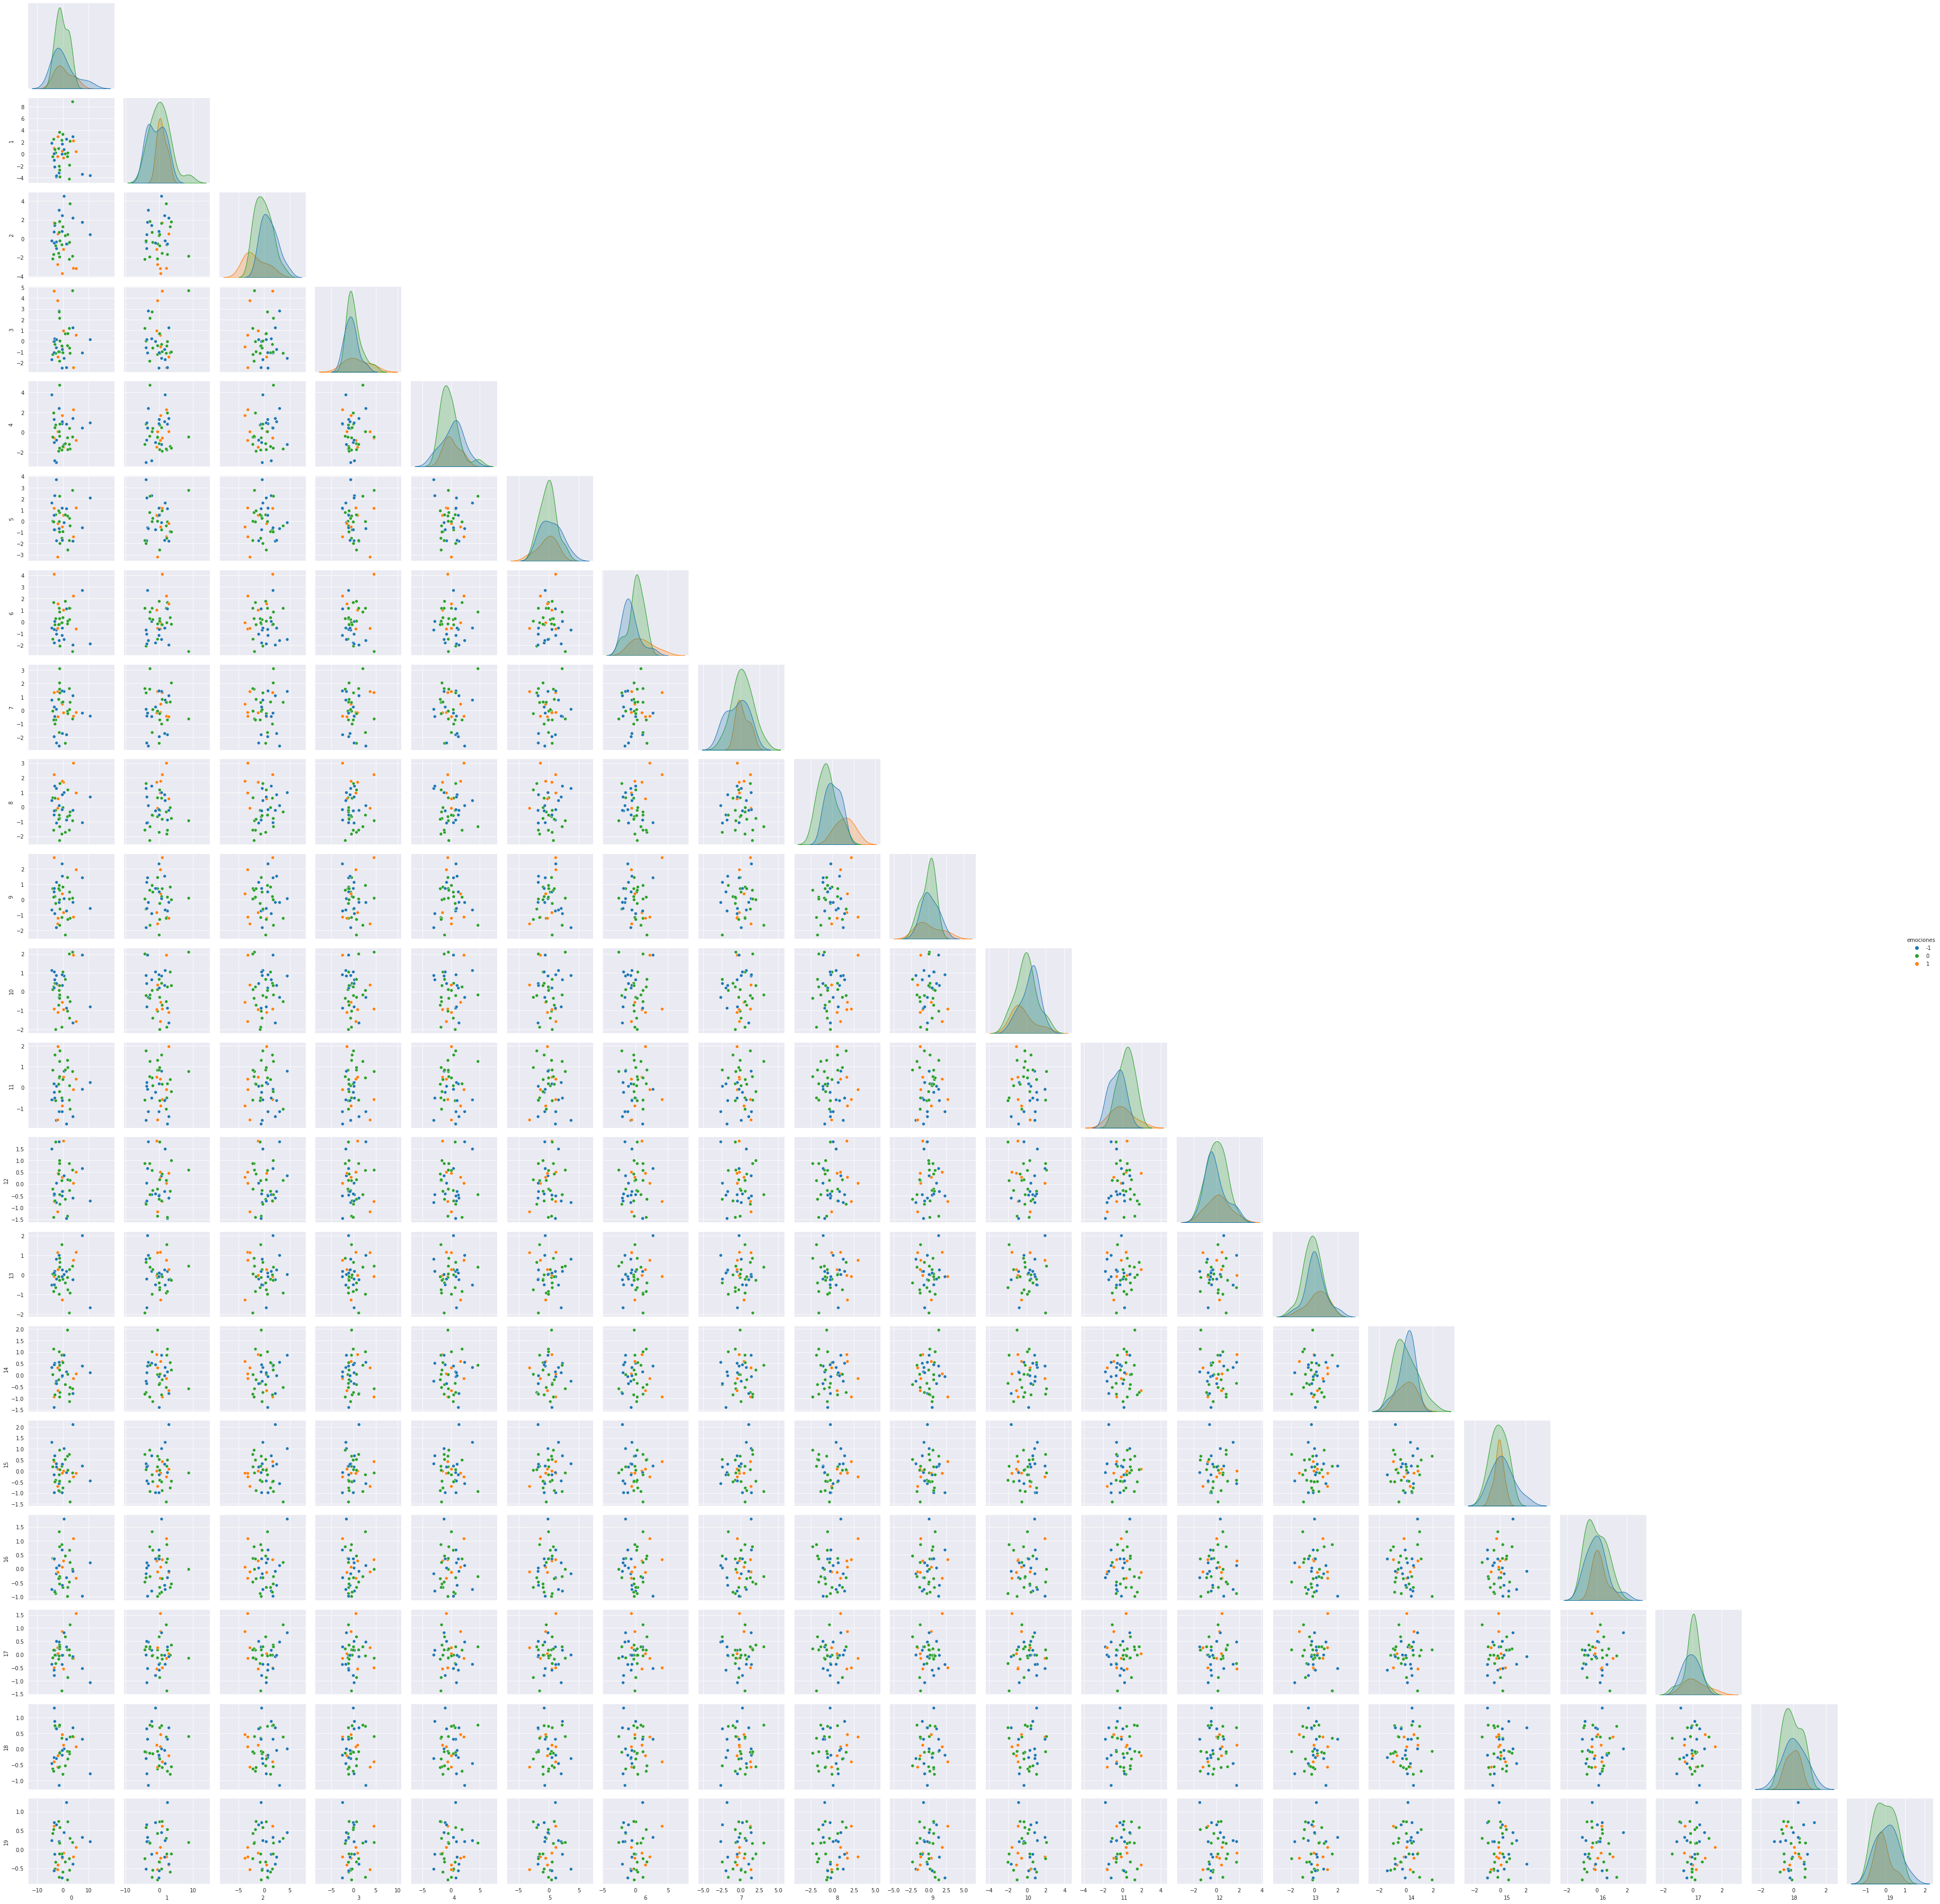

<Figure size 432x288 with 0 Axes>

In [19]:
projected_20 = pca_function(Xscaled, 20)

Se puede observar en las figuras para valores de q = 10,15 y 20, que las caracteristicas siguen agrupadas y no existe una separación que depende de las emociones. Esto debido a que cuando se trabaja con señales biologicas es muy dificil que se presente un agrupamiento de datos marcado para una etiqueta. 

In [20]:
def Logistic_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelRL = LogisticRegression(C = 0.05)
    modelRL.fit(Xtrain,ytrain)

    y_est_train = modelRL.predict(Xtrain)
    y_est_test = modelRL.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'±',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'±',np.std(acc_test))

In [21]:
def pca_function_no_graph(Xscaled, q):
  pca = PCA(n_components = q)  # project from 42 to 40 dimensions

  projectedZ = pca.fit_transform(Xscaled)

  return projectedZ

In [22]:
projected_7 = pca_function_no_graph(Xscaled, 7)
projected_10 = pca_function_no_graph(Xscaled, 10)
projected_13 = pca_function_no_graph(Xscaled, 13)
projected_15 = pca_function_no_graph(Xscaled, 15)
projected_16 = pca_function_no_graph(Xscaled, 16)
projected_19 = pca_function_no_graph(Xscaled, 19)
projected_20 = pca_function_no_graph(Xscaled, 20)
projected_22 = pca_function_no_graph(Xscaled, 22)
projected_25 = pca_function_no_graph(Xscaled, 25)

In [23]:
print('Accuaracy score for Xscaled \n')
Logistic_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Logistic_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Logistic_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Logistic_Regression(projected_13)
print('\nAccuaracy score for projected_15 \n')
Logistic_Regression(projected_15)
print('\nAccuaracy score for projected_16 \n')
Logistic_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Logistic_Regression(projected_19)
print('\nAccuaracy score for projected_20 \n')
Logistic_Regression(projected_20)
print('\nAccuaracy score for projected_22 \n')
Logistic_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Logistic_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  0.9335714285714285 ± 0.03712224702910366
Acc Test:  0.5308333333333333 ± 0.1422317162629739

Accuaracy score for projected_7 

Acc Train:  0.7203571428571429 ± 0.05847880306712223
Acc Test:  0.4150000000000001 ± 0.11724854891307705

Accuaracy score for projected_10 

Acc Train:  0.8167857142857143 ± 0.059687750426870745
Acc Test:  0.5000000000000001 ± 0.14577379737113252

Accuaracy score for projected_13 

Acc Train:  0.9007142857142858 ± 0.04419922429829997
Acc Test:  0.555 ± 0.142507309754038

Accuaracy score for projected_15 

Acc Train:  0.9017857142857143 ± 0.03891874056732747
Acc Test:  0.5666666666666667 ± 0.13894443333777556

Accuaracy score for projected_16 

Acc Train:  0.9139285714285712 ± 0.0443475950156654
Acc Test:  0.5941666666666667 ± 0.1336740438529485

Accuaracy score for projected_19 

Acc Train:  0.9153571428571428 ± 0.04061234104183062
Acc Test:  0.5575 ± 0.14322428021967662

Accuaracy score for projected_20 

Acc Train:  0

Si comparamos el accuaracy score para los diferentes valores de q, podemos decir que por ejemplo con solo 7 componentes no se alcanza a obtener ni siquiera el 80% de la varianza por lo tanto su precisión no sera la mejor, de hecho en este analisis fue la que peor valor presento, se puede concluir que no se obtiene un buen desempeño solo con 7 componentes.

Ahora, desde el valor para q = 13 donde se obtiene aproximadamente el 90% de varianza según lo que se analizo anteriormente, en adelante se obtiene mejores resultados y un valor de precisión mejor de alrededor del 55% con una varianza de alrededor de 14%, se puede observar que para todo el dataset con las 42 componentes se obtuvo un resultado en el test de 0.53 ± 0.14 , esto muestra que con menos componentes podemos obtener un desempeño similar incluso mejor con menos componentes. 

Esto ayuda al costo computacional


In [24]:
from sklearn.naive_bayes import GaussianNB
def Bayesian_Regression(Xscaled):
  acc_train = []
  acc_test = []
  Nreps = 100
  for it in range(Nreps):

    Xtrain, Xtest, ytrain, ytest = train_test_split(Xscaled,labels,test_size=0.3)

    modelB = GaussianNB()
    modelB.fit(Xtrain,ytrain)

    y_est_train = modelB.predict(Xtrain)
    y_est_test = modelB.predict(Xtest)
    acc_train.append(accuracy_score(ytrain,y_est_train))
    acc_test.append(accuracy_score(ytest,y_est_test))


  print('Acc Train: ',np.mean(acc_train),'±',np.std(acc_train))
  print('Acc Test: ',np.mean(acc_test),'±',np.std(acc_test))

In [30]:
print('Accuaracy score for Xscaled \n')
Bayesian_Regression(Xscaled)
print('\nAccuaracy score for projected_7 \n')
Bayesian_Regression(projected_7)
print('\nAccuaracy score for projected_10 \n')
Bayesian_Regression(projected_10)
print('\nAccuaracy score for projected_13 \n')
Bayesian_Regression(projected_13)
print('\nAccuaracy score for projected_15 \n')
Bayesian_Regression(projected_15)
print('\nAccuaracy score for projected_16 \n')
Bayesian_Regression(projected_16)
print('\nAccuaracy score for projected_19 \n')
Bayesian_Regression(projected_19)
print('\nAccuaracy score for projected_20 \n')
Bayesian_Regression(projected_20)
print('\nAccuaracy score for projected_22 \n')
Bayesian_Regression(projected_22)
print('\nAccuaracy score for projected_25 \n')
Bayesian_Regression(projected_25)

Accuaracy score for Xscaled 

Acc Train:  1.0 ± 0.0
Acc Test:  1.0 ± 0.0

Accuaracy score for projected_7 

Acc Train:  0.8153571428571428 ± 0.06605791367568063
Acc Test:  0.44333333333333336 ± 0.12297244497131146

Accuaracy score for projected_10 

Acc Train:  0.8717857142857143 ± 0.05177832459590776
Acc Test:  0.4491666666666667 ± 0.14283586151010305

Accuaracy score for projected_13 

Acc Train:  0.9453571428571427 ± 0.040233692348577696
Acc Test:  0.5466666666666666 ± 0.13034143197344766

Accuaracy score for projected_15 

Acc Train:  0.9535714285714283 ± 0.03624604130390077
Acc Test:  0.4791666666666666 ± 0.13456462718295953

Accuaracy score for projected_16 

Acc Train:  0.9489285714285712 ± 0.03788240397087076
Acc Test:  0.4858333333333333 ± 0.1178835348035415

Accuaracy score for projected_19 

Acc Train:  0.9642857142857142 ± 0.031134992453861938
Acc Test:  0.4641666666666666 ± 0.1286980747503413

Accuaracy score for projected_20 

Acc Train:  0.9667857142857144 ± 0.0291263083

Para el modelo Bayesiano se nota mas el impacto de los datos transformados al espacio latente, se puede observar que con las 42 caracteristicas obtuvimos un valor de precisión de 0.3175 +/- 0.12 para los datos de test, sin embargo cuando aplicamos el modelo a los datos transformados al espacio latente podemos observar que con 13 componentes el desempeño del modelo mejora notablemente obteniendo un valor de precisión de 0.49 +/- 0.12.

##Conclusiones

-Al aplicar PCA a las caracteristicas con el fin de reducir la dimensionalidad y llevarlas al espacio latente con el numero de caracteristicas que representaban el 90% de la varianza, no se pudo lograr una mejor visualizacion de ellas dado que igualmente se veian agrupadas entre si.Dado en el contexto de lo que representan las caracteristicas es algo que se puede sustentar que iba a suceder de que no se separaran debido a que señales de tipo biologicas tienen este comportamiento,y se necesitan de metodos mas robustos para lograr el agrupamiento por etiqueta,en este caso emociones.

-Al reducir la dimensionalidad de los dataset,primero se ayuda a un mejor analisis de los datos pues se pueden contar con caracteristicas mas representativas y "desechar" las que no aportan tanta informacion al análisis.Además, se logra reducir la complejidad computacional pues las operaciones internas que hacen los equipos de analisis serán de menor tamaño.
